#### Random Forests
Random forest technique works by aggregating the results from a number of randomly perturbed decision trees constructed to explain the data.

A bit on bootstrap aggregation
The idea of random forests arises naturally by first considering Tree bagging. In tree bagging we do the following $b$ times:

1.Take a random subsample of your data

2.Build a classification (or regression) tree like in the previous section

3.repeat

For a new data point we can then simply run that point through all the $b$ trees constructed, get all the decisions $\hat{Y}_1,..., \hat{Y}_b$ and take a majority vote. This form of averaging gets rid of some of the over-fitting issues found in just using one tree. Plus fitting these trees costs a lot computationally, so what else can we do?

Leads to Random Forests?

This method is very similar to the bootstrap aggregation method. However, as the name suggests some extra randomness is injected into the building of the trees. It turns out that the trees that are build from the random subsample of your data are quite similar, so the solution is quite simple. In Random Forests we do the following $b$ times:

1.Take a random subsample of your data

2.Select m variables at random out of all M possible variables (independently for each node).

3.Find the best split on the selected m variables. Build out the entire tree.

4.repeat

We take a majority vote the same as before. Have a look at the help page for the Random Forest Classifier, we'll be optimizing two options: n_estimators - the number of trees in the forest, max_features - the number of features to consider when looking for the best split (step 2 above).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
 
plt.style.use('fivethirtyeight')

In [2]:
filename = r'.\data\telecom_churn.csv'
telecom_df = pd.read_csv(filename)
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Bootstrapping Example:

In [3]:
def get_bootstrap_samples(data, n_samples):
    """Generate bootstrap samples using the bootstrap method."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

# Save the data about the loyal and former customers to split the dataset
loyal_calls = telecom_df[telecom_df['Churn'] == False]['Customer service calls'] 
churn_calls= telecom_df[telecom_df['Churn'] == True]['Customer service calls'] 

loyal_mean_scores   = [np.mean(sample)  for sample in get_bootstrap_samples(loyal_calls.values, 1000)]
churn_mean_scores   = [np.mean(sample)  for sample in get_bootstrap_samples(churn_calls.values, 1000)]

def stat_intervals(stat, alpha):
    """Produce an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

print("Service calls from loyal: mean interval", stat_intervals(loyal_mean_scores, 0.05))
print("Service calls from churn: mean interval", stat_intervals(churn_mean_scores, 0.05))

Service calls from loyal: mean interval [ 1.40735965  1.4954386 ]
Service calls from churn: mean interval [ 2.07453416  2.38928571]


#### we see that, with 95% probability, the average number of customer service calls from loyal customers lies between 1.4 and 1.49 while the churned clients called 2.06 through 2.40 times on average. Also, note that the interval for the loyal customers is narrower, which is reasonable since they make fewer calls (0, 1 or 2) in comparison with the churned clients who called until they became fed up and switched providers.

In [4]:
telecom_df['International plan'] = pd.factorize(telecom_df['International plan'])[0]
telecom_df['Voice mail plan'] = pd.factorize(telecom_df['Voice mail plan'])[0]
telecom_df['Churn'] = telecom_df['Churn'].astype('int')
states = telecom_df['State']
y = telecom_df['Churn']
telecom_df.drop(['State','Churn'], axis=1, inplace=True)
telecom_df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [5]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(telecom_df,y,test_size=0.3, random_state =17)

In [6]:
print("Training data \n predictors shape:{}, target shape:{}".format(train_X.shape,train_y.shape))
print("Test data \n predictors shape:{}, target shape:{}".format(test_X.shape,test_y.shape))


Training data 
 predictors shape:(2333, 18), target shape:(2333,)
Test data 
 predictors shape:(1000, 18), target shape:(1000,)


In [7]:
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
def plot_learning_curve(train_sizes, train_scores, validation_scores):
    plt.figure()
    plt.title("Learning Curve")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.2, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g" ,label="Cross-validation score")
    plt.ylim(max(-3, validation_scores_mean.min() - .1), train_scores_mean.max() + .1)
    plt.legend(loc="best")
    plt.show()

In [15]:
from sklearn.metrics import roc_curve
def plot_roc(X_val,y_val,model):
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.title("roc_curve");
    # find threshold closest to zero:
    close_zero = np.argmin(np.abs(thresholds))
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)
    plt.show()

In [17]:
from sklearn import metrics
from sklearn.metrics import roc_curve
def measure_performance(X, y, clf, show_accuracy=True,show_classification_report=True,
                        show_confusion_matrix=True, show_r2_score=False):
    y_pred = clf.predict(X) 
    if show_accuracy:
        print ("Accuracy:{0:.3f}".format( metrics.accuracy_score(y, y_pred)) )
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred))
    if show_confusion_matrix:
        print("Confusion matrix") 
        print(metrics.confusion_matrix(y, y_pred),)
    if show_r2_score:
        print ("Coefficient of determination:{0:.3f}"
               .format( metrics.r2_score(y, y_pred)))
    return y_pred

In [8]:
def evaluvate_model(clf ,X_trainmodel, y_trainmodel,X_val,y_val): 
    clf.fit(X_trainmodel, y_trainmodel.values.ravel())
    train_sizes, train_scores, validation_scores = learning_curve(clf, 
                                                                  X_trainmodel,y_trainmodel.values.ravel(),cv=kfold)
    plot_learning_curve(train_sizes, train_scores, validation_scores)
    plot_roc(X_val,y_val,clf)
    y_pred=measure_performance(X_val,y_val,clf, show_accuracy=False, 
                               show_classification_report=True,
                               show_confusion_matrix=True, show_r2_score=False)



In [10]:
from sklearn.ensemble import RandomForestClassifier
forest_params = {'max_depth': range(1,11),
                 'max_features': ['sqrt'],
                 'min_samples_leaf':range(1,6,2)}
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)
forest_grid = GridSearchCV(forest, forest_params,cv=5, n_jobs=-1, verbose=True)
forest_grid.fit(train_X, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   43.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': range(1, 6, 2), 'max_depth': range(1, 11), 'max_features': ['sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

Best parameters: {'min_samples_leaf': 1, 'max_depth': 9, 'max_features': 'sqrt'}
Best cross-validation score: 0.95
Best estimator:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=17, verbose=0, warm_start=False)


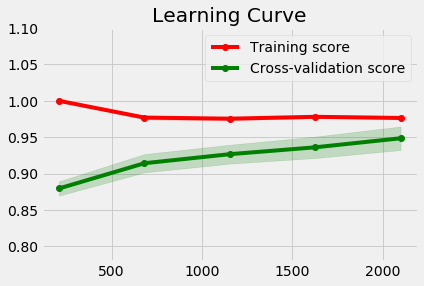

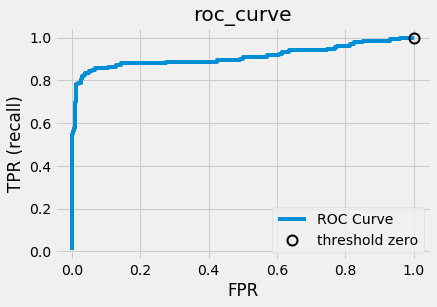

Classification report
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       867
          1       0.92      0.68      0.78       133

avg / total       0.95      0.95      0.95      1000

Confusion matrix
[[859   8]
 [ 42  91]]


In [18]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10)
best_forest = forest_grid.best_estimator_
print("Best parameters: {}".format(forest_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(forest_grid.best_score_))
print("Best estimator:\n{}".format(forest_grid.best_estimator_))
evaluvate_model(best_forest,train_X, train_y,test_X,test_y)
 

##### Points to note
For classification problems, it is advisable to set m=√d. For regression problems, we usually take m=d/3, where d is the number of features. It is recommended to build each tree until all of its leaves contain only nmin=1 examples for classification and nmin=5 examples for regression.
##### parameters to note
n_estimators -is the number of trees in the forest;

criterion -is the function used to measure the quality of a split;

max_features -is the number of features to consider when looking for the best split;

min_samples_leaf- is the minimum number of samples required to be at a leaf node;

max_depth -is the maximum depth of the tree.